# Quick Guide to the Code

This Jupyter Notebook is a guide to most commom and useful functions in the project and how to use them.

More information about the physics and implementation of the code can be found in [Future Paper](https://)

## Table of Contents:
* [0.Solar Neutrinos Precession](#zeroth-bullet)
* [1.Isotropic and Monoenergetic Neutrino Gas](#first-bullet)
* [2. Istropic Neutrino Gas with Spectral Distribution](#second-bullet)

In [1]:
#Importing Libraries
from Plots import *
import matplotlib.pyplot as plt
import time 

# 0. Solar Neutrinos Precession <a class="anchor" id="zeroth-bullet"></a>

The solver for the Solar neutrinos scenario is called *solar_solver* and it is implemented in the file [`ODE_Solar.py`](ODE_Solar.py). Its input and output are the following:

* **Input**: 
    - Neutrino Energy [MeV], 
    - Initial Radius [$R_\odot$]
    - Final Radius [$R_\odot$]

* **Output**: 
    - Neutrino $\vec{P}$ Polarization Vector Array [3 Components][Radius Bins], 
    - Hamiltonian $\vec{B}$ Polarization Vector Array [3 Components][Radius Bins]
    - Radius Array [$R_\odot$]

In [2]:
from ODE_Solar import solver_solar

E_high=30 #Mev
E_low=0.1 #Mev
r_i,r_f =0,1 #R_solar

P_high,B_high,r_per_R_sol=solver_solar(E_high,r_i,r_f)
P_low,B_low,r_per_R_sol=solver_solar(E_low,r_i,r_f)

### Probability Plots

Here we plot the survival and conversion probability of the neutrino as a function of the propagated radius. We also compare it to the expected analytical averaged probabilities.

For **high energy** neutrinos:

$$
\left < P^{High}_{\nu_e \rightarrow \nu_e} \right > \approx \frac{1}{2} - \frac{1}{2} \cos{2\theta}= \sin^2{\theta}
$$

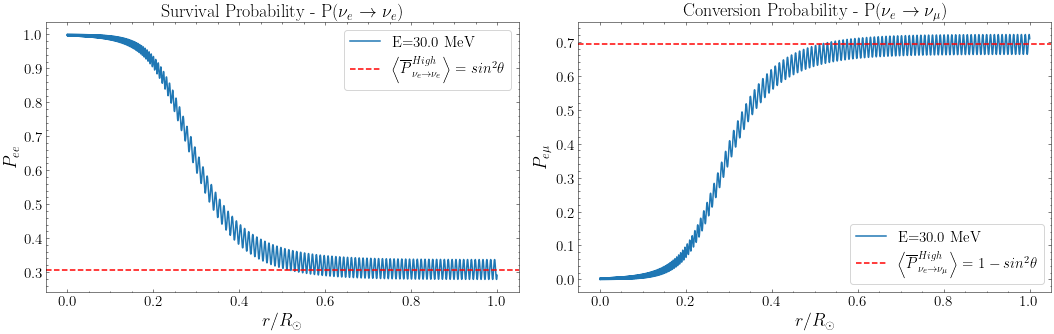

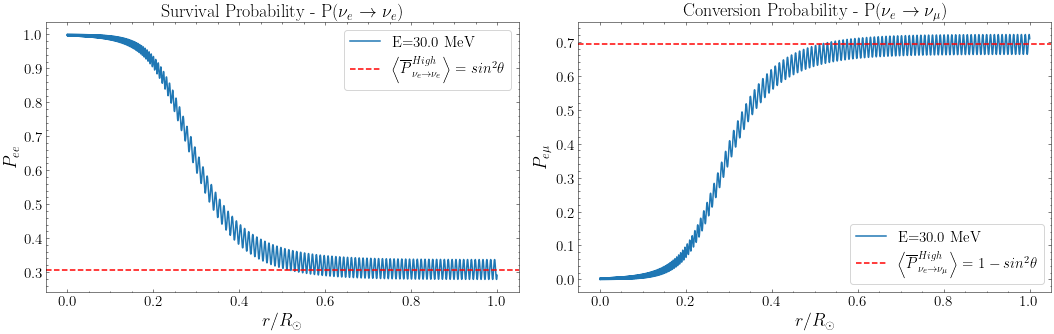

In [3]:
Plot_Probability_Solar(P_high[2],r_per_R_sol,E_high)

In [5]:
ani=Pol_Vec_Anim_Solar(P_high,B_high,r_per_R_sol,E_high)
ani.save('Figures/Solar_High_Energy.gif')
HTML(ani.to_html5_video())

For **low energy** neutrinos:

$$
\left < P^{Low}_{\nu_e \rightarrow \nu_e} \right > \approx 1 - \frac{1}{2} \sin^2{2\theta}
$$

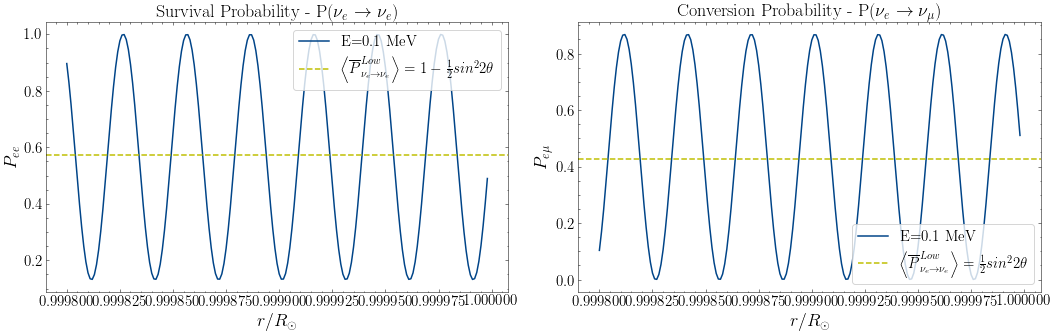

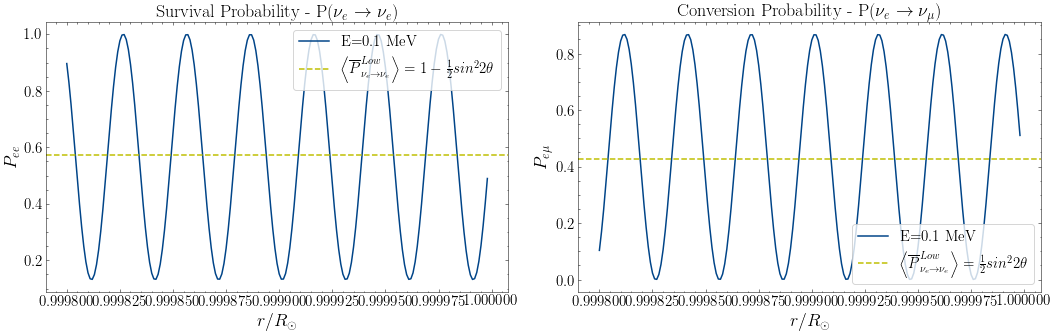

In [99]:
Plot_Probability_Solar(P_low[2][-200:-1],r_per_R_sol[-200:-1],E_low)

In [7]:
ani=Pol_Vec_Anim_Solar(P_low,B_low,r_per_R_sol[0:400],E_low)
HTML(ani.to_html5_video())

# 1. Isotropic and Monoenergetic Neutrino Gas <a class="anchor" id="first-bullet"></a>

## 1.1. Symmetric and $\mu=$ const

In [4]:
from ODE_Isotropic_Monoenergetic import *

In [5]:
P=[0,0,1,0,0,1]
E=20 #MeV
r_i,r_f=0,10 #km
omega=delta_m2_31/(2*E*10**6)
omega_max=delta_m2_31/(2*10**6)
mu_opt,mu_0 ="const", 10*omega_max

P_nu_IH,P_nubar_IH,H_vac_IH,H_nue_IH,r_IH=solver_Isotropic_Monoenergetic(P,E,r_i,r_f,"IH",mu_opt,mu_0)
P_nu_NH,P_nubar_NH,H_vac_NH,H_nue_NH,r_NH=solver_Isotropic_Monoenergetic(P,E,r_i,r_f,"NH",mu_opt,mu_0)

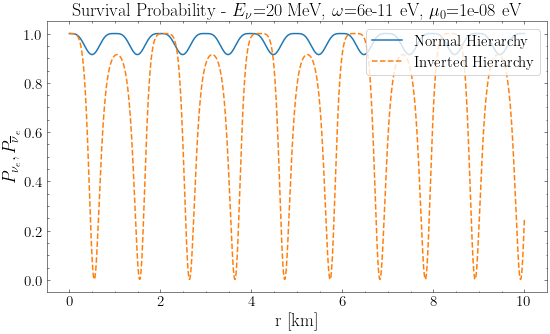

In [6]:
Plot_Probability_Isotropic(P_nu_NH,P_nu_IH,r_NH,E,omega,mu_0)

In [51]:
ani=Pol_Vec_Anim_Isotropic(P_nu_IH,P_nubar_IH,-1*H_vac_IH,r_IH,E,"IH")
ani.save('Figures/Bipolar_Oscillations_mu_constant_IH.gif')
HTML(ani.to_html5_video())

In [52]:
ani=Pol_Vec_Anim_Isotropic(P_nu_NH,P_nubar_NH,H_vac_NH,r_NH,E,"NH")
ani.save('Figures/Bipolar_Oscillations_mu_constant_NH.gif')
HTML(ani.to_html5_video())

## 1.2. Symmetric and $\mu=(r)$

In [7]:
P=[0,0,1,0,0,1]
E=20 #MeV
r_i,r_f=0,200 #km

omega=delta_m2_31/(2*E*10**6)
omega_max=delta_m2_31/(2*10**6)
mu_opt,mu_0 ="SN", 10*omega_max

start_time = time.time()
P_nu_IH,P_nubar_IH,H_vac_IH,H_nue_IH,r_IH=solver_Isotropic_Monoenergetic(P,E,r_i,r_f,"IH",mu_opt,mu_0)
P_nu_NH,P_nubar_NH,H_vac_NH,H_nue_NH,r_NH=solver_Isotropic_Monoenergetic(P,E,r_i,r_f,"NH",mu_opt,mu_0)
print("Took %s minutes" % ((time.time() - start_time)/60))

Took 0.15326350132624308 minutes


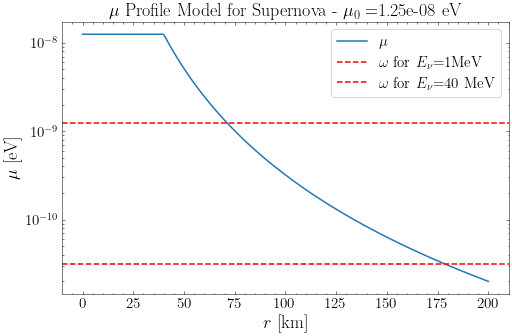

In [8]:
fig = plt.figure(1, figsize=(8,5)) 
r=np.linspace(r_i,r_f,1000)
plt.plot(r,mu_supernova_vec(r,mu_opt,mu_0), label=r"$\mu$")
plt.axhline(y=delta_m2_31/(2*1*10**6), color="red", linestyle="--", label=r'$\omega$ for $E_{\nu}$=1MeV')
plt.axhline(y=delta_m2_31/(2*40*10**6), color="red", linestyle="--", label=r'$\omega$ for $E_{\nu}$=40 MeV')
plt.xlabel(r'$r$ [km]')
plt.ylabel(r'$\mu$ [eV]')
plt.yscale('log')
plt.title(r"$\mu$ Profile Model for Supernova - $\mu_0=$%.2e eV"%(mu_0))
plt.legend()
plt.savefig("Figures/SN_mu_profile.png")

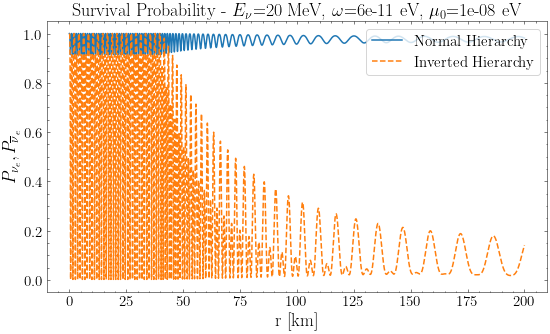

In [9]:
Plot_Probability_Isotropic(P_nu_NH,P_nu_IH,r_NH,E,omega,mu_0)

In [17]:
ani=Pol_Vec_Anim_Isotropic_mu_Profile(P_nu_IH,P_nubar_IH,-1*H_vac_IH,r_IH,E,mu_0,"IH")
ani.save('Figures/Bipolar_Oscillations_mu_decreasing_IH.gif')
HTML(ani.to_html5_video())

In [18]:
ani=Pol_Vec_Anim_Isotropic_mu_Profile(P_nu_NH,P_nubar_NH,H_vac_NH,r_NH,E,mu_0,"NH")
ani.save('Figures/Bipolar_Oscillations_mu_decreasing_NH.gif')
HTML(ani.to_html5_video())

## 1.3. Asymmetric and $\mu=(r)$

In [11]:
P=[0,0,1,0,0,0.8]
E=20 #MeV
r_i,r_f=0,200 #km
omega=delta_m2_31/(2*E*10**6)
omega_max=delta_m2_31/(2*1*10**6)
mu_opt,mu_0 ="SN", 10*omega_max

start_time = time.time()
P_nu_IH,P_nubar_IH,H_vac_IH,H_nue_IH,r_IH=solver_Isotropic_Monoenergetic(P,E,r_i,r_f,"IH",mu_opt,mu_0)
P_nu_NH,P_nubar_NH,H_vac_NH,H_nue_NH,r_NH=solver_Isotropic_Monoenergetic(P,E,r_i,r_f,"NH",mu_opt,mu_0)
print("Took %s minutes" % ((time.time() - start_time)/60))

Took 0.15358539819717407 minutes


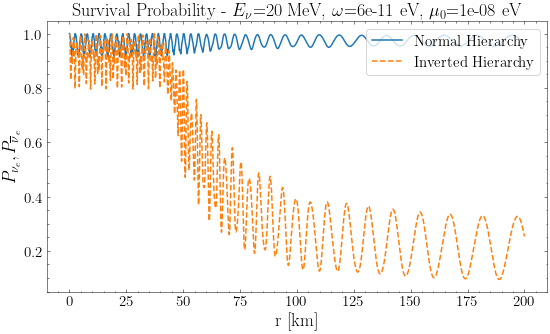

In [12]:
Plot_Probability_Isotropic(P_nu_NH,P_nu_IH,r_NH,E,omega,mu_0)

In [ ]:
ani=Pol_Vec_Anim_Isotropic_mu_Profile(P_nu_IH,P_nubar_IH,-1*H_vac_IH,r_IH,E,mu_0,"IH")
ani.save('Figures/Bipolar_Oscillations_Assymetric_mu_decreasing_IH.gif')
HTML(ani.to_html5_video())

In [22]:
ani=Pol_Vec_Anim_Isotropic_mu_Profile(P_nu_NH,P_nubar_NH,H_vac_NH,r_NH,E,mu_0,"NH")
ani.save('Figures/Bipolar_Oscillations_Assymetric_mu_decreasing_NH.gif')
HTML(ani.to_html5_video())

# 2. Istropic Neutrino Gas with Spectral Distribution <a class="anchor" id="second-bullet"></a>

In [36]:
from ODE_Isotropic_Spectrum import *

nu_types=['nu_e','nu_x']
r_i,r_f=0,200 #km
E_i,E_f=1,50
E_step=0.5

#Initial spectrum
E_0=[10,15,24,24] #Mean energy in MeV
Amplitude=[1,1*10/15,1*10/24,1*10/24]

mass_ord="NH"
start_time = time.time()
E_vec,r_vec,mu_0,nu_e_time_NH,nubar_e_time_NH, nu_x_time_NH,nubar_x_time_NH,nu_NH,nubar_NH=solver_two_families(nu_types,r_i,r_f,E_i,E_f,E_step,E_0,Amplitude,mass_ord)
print("Took %s minutes" % ((time.time() - start_time)/60))

mass_ord="IH"
start_time = time.time()
E_vec,r_vec,mu_0,nu_e_time_IH,nubar_e_time_IH, nu_x_time_IH,nubar_x_time_IH,nu_IH,nubar_IH=solver_two_families(nu_types,r_i,r_f,E_i,E_f,E_step,E_0,Amplitude,mass_ord)
print("Took %s minutes" % ((time.time() - start_time)/60))

Took 2.635664498806 minutes
Took 2.5590054829915365 minutes


### Plots

In [40]:
def Plot_Spectrum(E_vec,E_0,mu_0,nu_e,nubar_e, nu_x,nubar_x,title):
    fig= plt.figure(figsize=(15, 6), dpi= 80, facecolor='w', edgecolor='k')
    
    ax1=fig.add_subplot(1,2,1)
    #nu_e
    ax1.plot(E_vec, nu_e[-1],color='b',label=r'$\nu_e$')
    ax1.plot(E_vec, nu_e[0],color='b', linestyle="--",label=r'$\nu_e(t=0)$')#Initial
    #nu_x
    ax1.plot(E_vec,nu_x[-1],color='g',label=r'$\nu_x$')
    ax1.plot(E_vec, nu_x[0],color='g', linestyle="--",label=r'$\nu_x(t=0)$')#Initial
    #Text
    ax1.set_title("Neutrinos")
    ax1.set_xlabel(r'$E [MeV]$')
    ax1.set_ylabel(r'$\phi(E) [a.u.]$')
    ax1.legend(loc='upper right')
    ax1.set_ylim(0,1.1*max(nu_e[0]))
    
    ax2=fig.add_subplot(1,2,2)
    #nubar_e
    ax2.plot(E_vec,nubar_e[-1],color='r',label=r'$\overline{\nu}_e$')
    ax2.plot(E_vec, nubar_e[0],color='r', linestyle="--",label=r'$\overline{\nu}_e(t=0)$')#Initial
    #nubar_x
    ax2.plot(E_vec,nubar_x[-1],color='orange',label=r'$\overline{\nu}_x$')
    ax2.plot(E_vec, nubar_x[0],color='orange', linestyle="--",label=r'$\nu_x(t=0)$')#Initial
    #Text
    ax2.set_title("Antineutrinos")
    ax2.set_xlabel(r'$E [MeV]$')
    ax2.set_ylabel(r'$\phi(E) [a.u.]$')
    ax2.legend(loc='upper right')
    ax2.set_ylim(0,1.1*max(nu_e[0]))
    
    fig.suptitle((r'Isotropic Neutrino Gas - Mass Hierarchy: %s'%(title))+"\n"+
                 (r"$\overline{E}_{\nu_e}= %.1f$ MeV, $\overline{E}_{\overline{\nu}_e}= %.1f$ MeV, $\overline{E}_{\nu_x}= %.1f$ MeV, $\mu_0$=%1.e eV"%(E_0[0],E_0[1],E_0[2],mu_0)))
    plt.tight_layout()
    fig.savefig("Figures/Isotrpic_Gas_Spectrum_%s.png"%title)

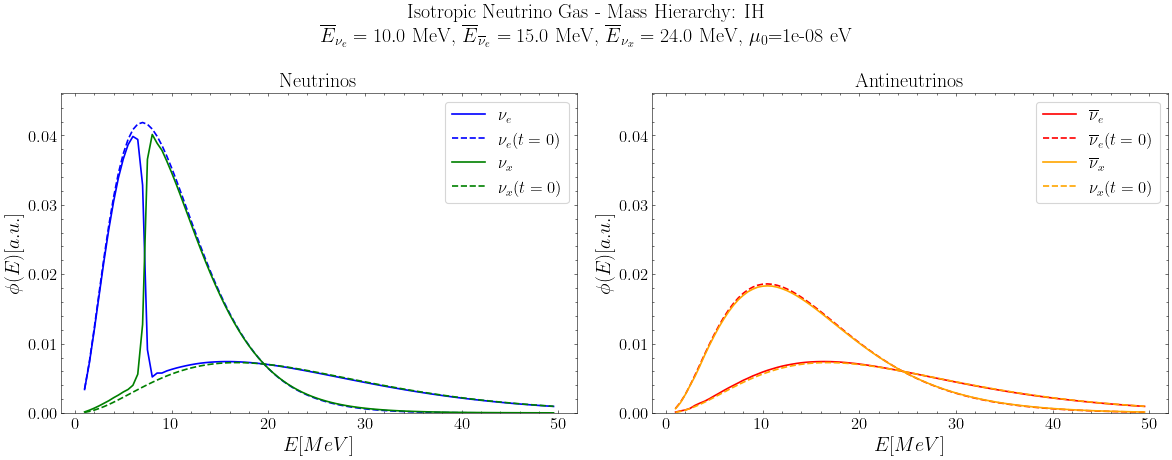

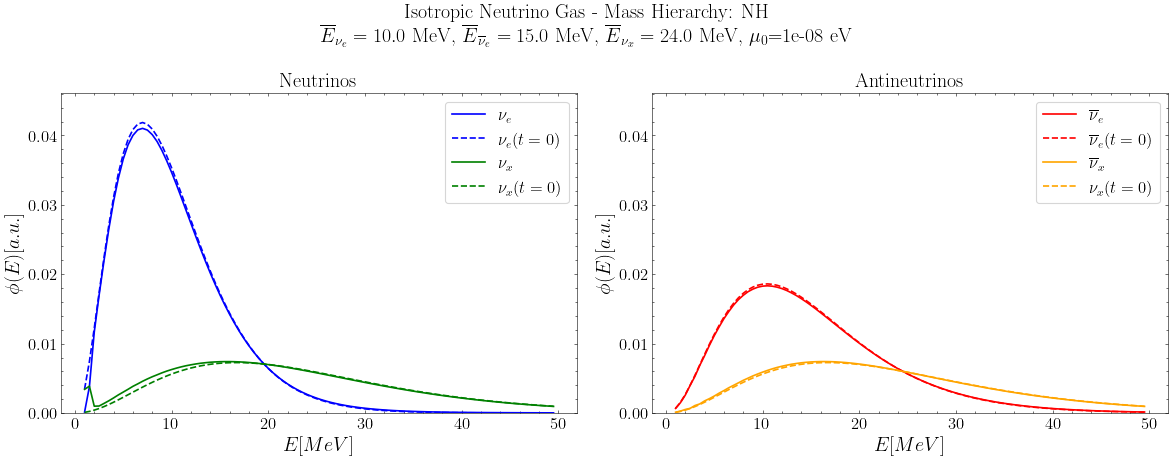

In [41]:
Plot_Spectrum(E_vec,E_0,mu_0,nu_e_time_IH,nubar_e_time_IH, nu_x_time_IH,nubar_x_time_IH,"IH")
Plot_Spectrum(E_vec,E_0,mu_0,nu_e_time_NH,nubar_e_time_NH, nu_x_time_NH,nubar_x_time_NH,"NH")

### Animations

In [9]:
anim_IH=animation_2_families_spectrum(E_vec,r_vec,nu_e_time_IH,nubar_e_time_IH, nu_x_time_IH,nubar_x_time_IH,"IH")
HTML(anim_IH.to_html5_video())

# Other Plots

In [23]:
def Pol_Vec_Sol_Initial_Final(P,B,E):
    fig = plt.figure(figsize=(16, 5), dpi= 80, facecolor='w', edgecolor='k')
    ax1 = fig.add_subplot(1,2,1,projection='3d')

    B1,B2,B3=B[0][0],B[1][0],B[2][0]
    quiver_B = ax1.quiver(0, 0, 0, B1, B2, B3, arrow_length_ratio=0.05,color='r',label=r'$\vec{B}$',normalize=True)
    P1,P2,P3= P[0][0],P[1][0],P[2][0]
    quiver = ax1.quiver(0, 0, 0,P1,P2,P3, arrow_length_ratio=0.05,color='b',label=r'$\vec{P}$')
    ax1.plot(P[0][::],P[1][::], P[2][::],c='y')

    ax1.set_xlim(-1, 1)
    ax1.set_ylim(-1, 1)
    ax1.set_zlim(-1, 1)
    ax1.quiver(-0.5, 0, 0, 1, 0, 0, arrow_length_ratio=0.05,color='k')
    ax1.text(0.6,0,0, r"$\hat{e}^F_1$", color='k')
    ax1.quiver(0, -0.5, 0, 0, 1, 0, arrow_length_ratio=0.05,color='k')
    ax1.text(0,0.6,0, r"$\hat{e}^F_2$", color='k')
    ax1.quiver(0, 0, -0.5, 0, 0, 1, arrow_length_ratio=0.05,color='k')
    ax1.text(0,0,0.6, r"$\hat{e}^F_3$", color='k')
    ax1.set_title(r'Precession - Initial State - $E_\nu=%.1f$ MeV'%(E))
    ax1.legend()


    ax2 = fig.add_subplot(1,2,2,projection='3d')

    B1,B2,B3=B[0][-1],B[1][-1],B[2][-1]
    quiver_B = ax2.quiver(0, 0, 0, B1, B2, B3, arrow_length_ratio=0.05,color='r',label=r'$\vec{B}$',normalize=True)
    P1,P2,P3= P[0][-1],P[1][-1],P[2][-1]
    quiver = ax2.quiver(0, 0, 0,P1,P2,P3, arrow_length_ratio=0.05,color='b',label=r'$\vec{P}$')
    ax2.plot(P[0][::],P[1][::], P[2][::],c='y')

    ax2.set_xlim(-1, 1)
    ax2.set_ylim(-1, 1)
    ax2.set_zlim(-1, 1)
    ax2.quiver(-0.5, 0, 0, 1, 0, 0, arrow_length_ratio=0.05,color='k')
    ax2.text(0.6,0,0, r"$\hat{e}^F_1$", color='k')
    ax2.quiver(0, -0.5, 0, 0, 1, 0, arrow_length_ratio=0.05,color='k')
    ax2.text(0,0.6,0, r"$\hat{e}^F_2$", color='k')
    ax2.quiver(0, 0, -0.5, 0, 0, 1, arrow_length_ratio=0.05,color='k')
    ax2.text(0,0,0.6, r"$\hat{e}^F_3$", color='k')
    ax2.set_title(r'Precession - Final State- $E_\nu=%.1f$ MeV'%(E))
    ax2.legend()

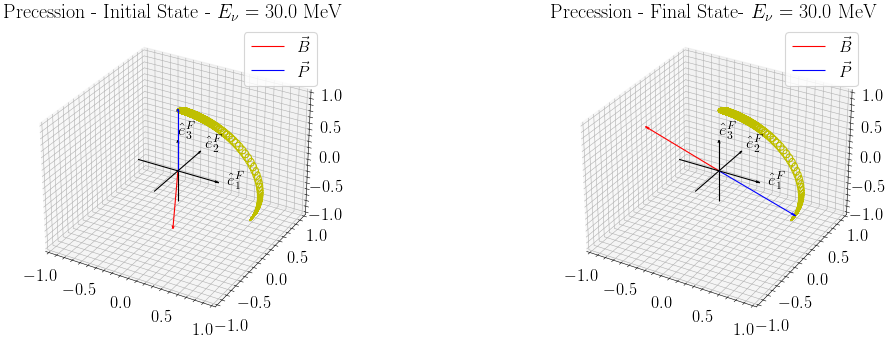

In [24]:
Pol_Vec_Sol_Initial_Final(P_high,B_high,E_high)

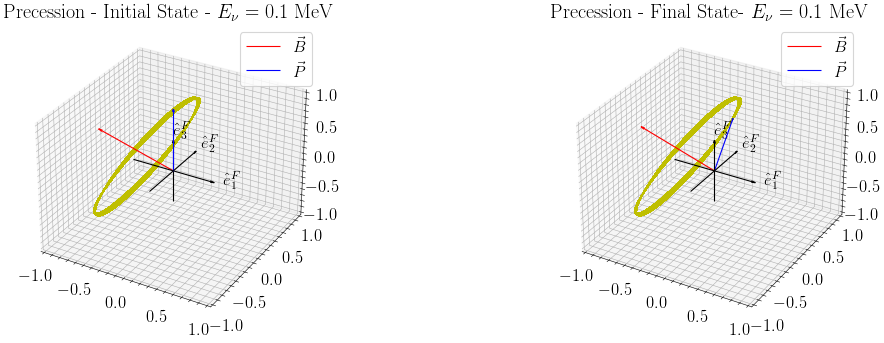

In [25]:
Pol_Vec_Sol_Initial_Final(P_low,B_low,E_low)

In [26]:
def Pol_Vec_Isotropic_Initial_Final(Pnu,Pnubar,B,E):
    fig = plt.figure(figsize=(16, 5), dpi= 80, facecolor='w', edgecolor='k')
    ax1 = fig.add_subplot(1,2,1,projection='3d')

    B1,B2,B3=B[0][0],B[1][0],B[2][0]
    quiver_B = ax1.quiver(0, 0, 0, B1, B2, B3, arrow_length_ratio=0.05,color='r',label=r'$\vec{B}$',normalize=True)
    P1,P2,P3= Pnu[0][0],Pnu[1][0],Pnu[2][0]
    quiver = ax1.quiver(0, 0, 0,P1,P2,P3, arrow_length_ratio=0.05,color='',label=r'$\vec{P}$')
    ax1.plot(P[0][::],P[1][::], P[2][::],c='y')

    ax1.set_xlim(-1, 1)
    ax1.set_ylim(-1, 1)
    ax1.set_zlim(-1, 1)
    ax1.quiver(-0.5, 0, 0, 1, 0, 0, arrow_length_ratio=0.05,color='k')
    ax1.text(0.6,0,0, r"$\hat{e}^F_1$", color='k')
    ax1.quiver(0, -0.5, 0, 0, 1, 0, arrow_length_ratio=0.05,color='k')
    ax1.text(0,0.6,0, r"$\hat{e}^F_2$", color='k')
    ax1.quiver(0, 0, -0.5, 0, 0, 1, arrow_length_ratio=0.05,color='k')
    ax1.text(0,0,0.6, r"$\hat{e}^F_3$", color='k')
    ax1.set_title(r'Precession - Initial State - $E_\nu=%.1f$ MeV'%(E))
    ax1.legend()


    ax2 = fig.add_subplot(1,2,2,projection='3d')

    B1,B2,B3=B[0][-1],B[1][-1],B[2][-1]
    quiver_B = ax2.quiver(0, 0, 0, B1, B2, B3, arrow_length_ratio=0.05,color='r',label=r'$\vec{B}$',normalize=True)
    P1,P2,P3= P[0][-1],P[1][-1],P[2][-1]
    quiver = ax2.quiver(0, 0, 0,P1,P2,P3, arrow_length_ratio=0.05,color='b',label=r'$\vec{P}$')
    ax2.plot(P[0][::],P[1][::], P[2][::],c='y')

    ax2.set_xlim(-1, 1)
    ax2.set_ylim(-1, 1)
    ax2.set_zlim(-1, 1)
    ax2.quiver(-0.5, 0, 0, 1, 0, 0, arrow_length_ratio=0.05,color='k')
    ax2.text(0.6,0,0, r"$\hat{e}^F_1$", color='k')
    ax2.quiver(0, -0.5, 0, 0, 1, 0, arrow_length_ratio=0.05,color='k')
    ax2.text(0,0.6,0, r"$\hat{e}^F_2$", color='k')
    ax2.quiver(0, 0, -0.5, 0, 0, 1, arrow_length_ratio=0.05,color='k')
    ax2.text(0,0,0.6, r"$\hat{e}^F_3$", color='k')
    ax2.set_title(r'Precession - Final State- $E_\nu=%.1f$ MeV'%(E))
    ax2.legend()

In [27]:
def Pol_Vec_Plot_Isotropic(Pnu,Pnubar,B,E,mu_0,mass_ord):
    fig = plt.figure(figsize=(8, 5), dpi= 80, facecolor='w', edgecolor='k')
    ax1 = fig.add_subplot(1,1,1,projection='3d')
    t_i=1000
    B1,B2,B3=B[0][t_i],B[1][t_i],B[2][t_i]
    #print(B1,B1,B3)
    quiver_B = ax1.quiver(0, 0, 0, B1, B2, B3, arrow_length_ratio=0.05,color='r',label=r'$\vec{B}$',normalize=True)
    P1,P2,P3= Pnu[0][t_i],Pnu[1][t_i],Pnu[2][t_i]
    quiver = ax1.quiver(0, 0, 0,P1,P2,P3, arrow_length_ratio=0.05,color='b',label=r'$\vec{P}_\nu$')
    P1,P2,P3= Pnubar[0][t_i],Pnubar[1][t_i],Pnubar[2][t_i]
    quiver = ax1.quiver(0, 0, 0,P1,P2,P3, arrow_length_ratio=0.05,color='g',label=r'$\vec{P}_{\overline{\nu}}$')
    
    ax1.plot(Pnu[0][::],Pnu[1][::], Pnu[2][::],c='y')

    ax1.set_xlim(-1, 1)
    ax1.set_ylim(-1, 1)
    ax1.set_zlim(-1, 1)
    ax1.quiver(-0.5, 0, 0, 1, 0, 0, arrow_length_ratio=0.05,color='k')
    ax1.text(0.6,0,0, r"$\hat{e}^F_1$", color='k')
    ax1.quiver(0, -0.5, 0, 0, 1, 0, arrow_length_ratio=0.05,color='k')
    ax1.text(0,0.6,0, r"$\hat{e}^F_2$", color='k')
    ax1.quiver(0, 0, -0.5, 0, 0, 1, arrow_length_ratio=0.05,color='k')
    ax1.text(0,0,0.6, r"$\hat{e}^F_3$", color='k')
    ax1.set_title(r'Precession - %s - $E_{\nu}$=%1.f MeV, $\mu_0$=%1.e eV'%(mass_ord,E,mu_0))
    ax1.legend()

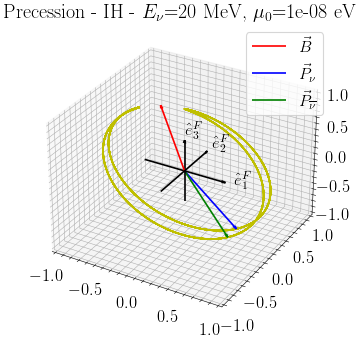

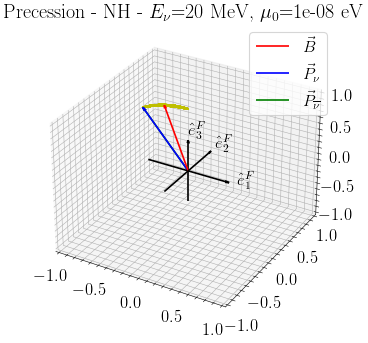

In [67]:
Pol_Vec_Plot_Isotropic(P_nu_IH,P_nubar_IH,-1*H_vac_IH,E,mu_0,"IH")
Pol_Vec_Plot_Isotropic(P_nu_NH,P_nubar_NH,H_vac_NH,E,mu_0,"NH")

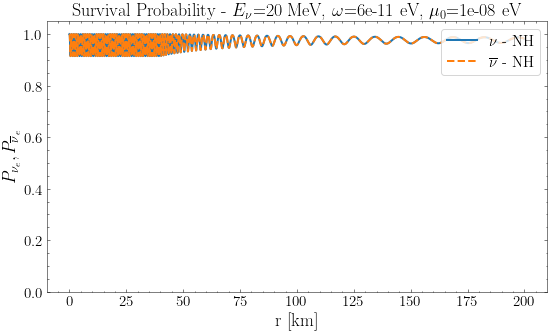

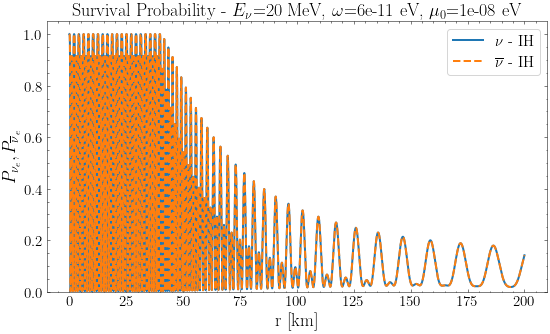

In [10]:
Plot_Probability_Isotropic_2([P_nu_NH,P_nubar_NH],[[r"$\nu$ - NH",'-',2],[r"$\overline{\nu}$ - NH",'--',2]],r_NH,E,omega,mu_0)
Plot_Probability_Isotropic_2([P_nu_IH,P_nubar_IH],[[r"$\nu$ - IH",'-',2],[r"$\overline{\nu}$ - IH",'--',2]],r_IH,E,omega,mu_0)

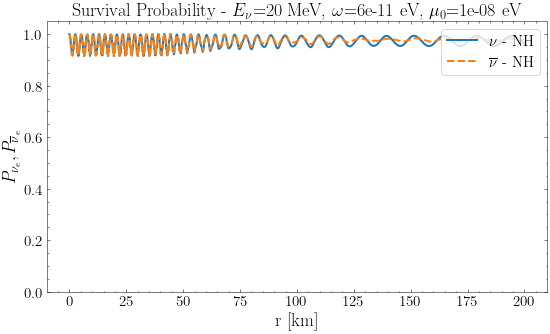

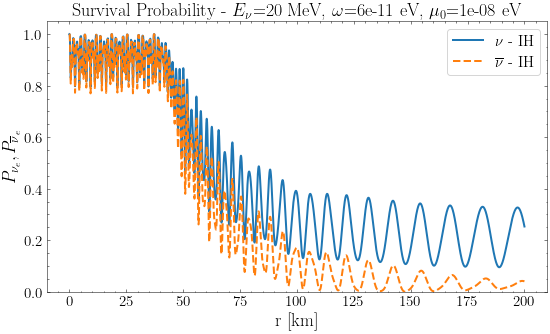

In [13]:
Plot_Probability_Isotropic_2([P_nu_NH,P_nubar_NH],[[r"$\nu$ - NH",'-',2],[r"$\overline{\nu}$ - NH",'--',2]],r_NH,E,omega,mu_0)
Plot_Probability_Isotropic_2([P_nu_IH,P_nubar_IH],[[r"$\nu$ - IH",'-',2],[r"$\overline{\nu}$ - IH",'--',2]],r_IH,E,omega,mu_0)